
## 1. Optimization

Coming back to our example from just now, trying to optimize y while controlling x thus we are looking for a function f
which generates a solution y as y = f(x). The key assumption of any attempt at optimization is the existence of an
optimal solution. Alternatively a solution which is sufficiently optimal, generally called $\hat{y}$. But how do we know
how good our solution is? We need to figure out how close it is to the theoretical optimal solution, for this we need a
cost function also known as the loss function or simply the loss which we try to minimize

A cost function can take many different shapes which depend on the number of parameters, application etc. a general way
of writing it is:

$
C(x) = \sum\limits_{i,j=1} ^{n} x_{i}Q_{ij}x_{j} + \sum\limits_{i=1} ^{n}c_{i}x_{i}
$

The simplest example for a cost function is one dimensional meaning we have a curve of which we find
the minimum. A tricky situation is non-convex loss function which can lead to being stuck at a local minimum.

To make the transition to quantum mechanics, we have to find a way to encode the loss function in a quantum mechanical
system. Thinking back to any sort of physics problem, we know that the system always takes the path of least resistance,
or occupies the state of least energy. We exploit this very principle when we encode our optimization problem into the
hamiltonian of a system. This allows us to find the solution to the problem simply as the ground state of our system. A
major advantage of this to the classical state is that the likelihood of finding local minima is a lot lower because of
a process called quantum annealing.

For Quantum annealing we start the state of the quantum system in a uniform superposition of all possible states. Then
the system evolves following the time-dependent Schrödinger equation, the quantum-mechanical evolution of physical
systems as determined by its Hamiltonian. Thus, the amplitudes of all candidate states keep changing, XXX ending up in
the ground state: our solution is found.

### 2. QAOA

After talking about the general differences between optimization in a classical and a quantum scenario we will continue
the lecture looking at a specific optimization algorithm, namely QAOA which stands for Quantum Approximate Optimization
Algorithm meaning we have an algorithm which gives an approximately optimal solution using quantum methods.

QAOA was designed to solve combinatorial optimization problems. These are the kind of problems which we can express in
terms of a particular cost function - a function that essentially tells us how good our solution is. The single
constraint is that only linear and quadratic terms are allowed. Solving an optimization problem means finding a solution
which minimizes the cost function. Now how do we minimize this function and how do we take advantage of quantum
computing?

Before we move on with minimization, lets talk about the Hamiltonians. Hamiltonian is something that governs the
behaviour of any quantum system. It also defines the energies, that our system can be in. QAOA is essentially an
algorithm that finds the ground state of a given Hamiltonian - that is the state which corresponds to the lowest energy
level.

Now the exciting part is that we can translate any cost function, which follows the constraints described above, into a
Hamiltonian. Hence, minimizing the cost function is equivalent to finding the ground state of the Hamiltonian.

Now how does one find this ground state? To do that we are going to take advantage of a fundamental theorem of quantum
physics - the adiabatic theorem - which tells us that if we have a system in its ground state and we transform this
system slowly enough, it will remain in its lowest energy state. Our approach will be to take a simple system, for which
we know the ground state and transform it into a system, which corresponds to out problem Hamiltonian, while it remains
in its ground state. We are going to do it in small steps.

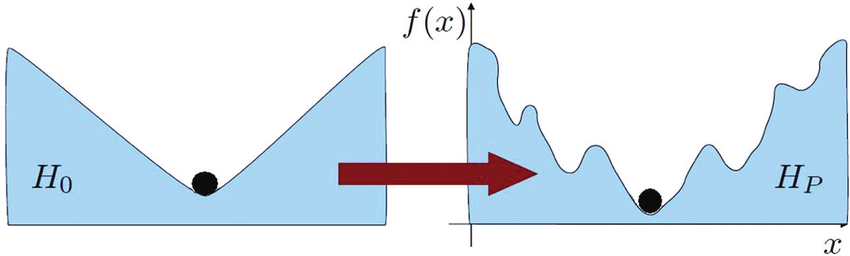

In [4]:
from IPython.display import Image
Image("images/Adiabatic-quantum-computation.png")
#source: https://www.researchgate.net/figure/Adiabatic-quantum-computation-The-energy-landscape-is-first-a-simple-one-with-one-global_fig2_315416652

Before we can understand how it is done, we are going to need some mathematical background.

As we mentioned, Hamiltonian governs the time evolution of quantum system. In particular in the following way:

$
\psi(t) = e^{-iHt/h}\psi(0)
$

Going back to our idea of transforming a quantum system, we can think of the following transformation:

$
H(t) = \frac{t}{T} H_{c} + (1 - \frac{t}{T})H_{m}
$

This is the point where we take advantage of quantum computing, because we can prepare this transformation in terms of quantum gates.
Now constructing a time evolution operator for this transformation is not trivial, because the problem and mixer
Hamiltonian don’t commute. Using the trotterization formula we can express the time evolution operator as a product of p
consecutive products of exponentiated mixer and problem Hamiltonian. At each step mixer and problem Hamiltonian
exponents are supplied with a parameter beta and gamma respectively. And these parameters play the key role because they
sort of simulate the adiabatic process that we want to apply to our system. Naturally one would expect betas to decrease
and gammas to increase. This reflects the fact that weight of the problem Hamiltonian should increase and the weight of
mixer decrease.

And this is something we can directly implement! In fact exponentiating the mixer Hamiltonian results in applying a
rotational X gate to each qubit whereby the rotation is performed at an angle 2 beta. Exponentiation the problem
Hamiltonian results in applying a number of rotational Z gates and controlled rotational Z gates to all the qubits.
Now these rotations also depend on the coefficients in our QUBO matrix.

Well, this explains now the layered architecture of QAOA. Let’s look at an example for a simple MAXCUT problem with just
one layer that we will see later. At first, we apply H gates to all the qubits to create the ground state of our mixer
Hamiltonian. Next follows a row of single rotational Z gates. Next, we have a controlled rotational Z gate between every
pair of qubits. Qiskit actually decomposes these gates into two CNOT gates and one rotational X gate which can are
available on IBM quantum devices. Finally, we measure our state.

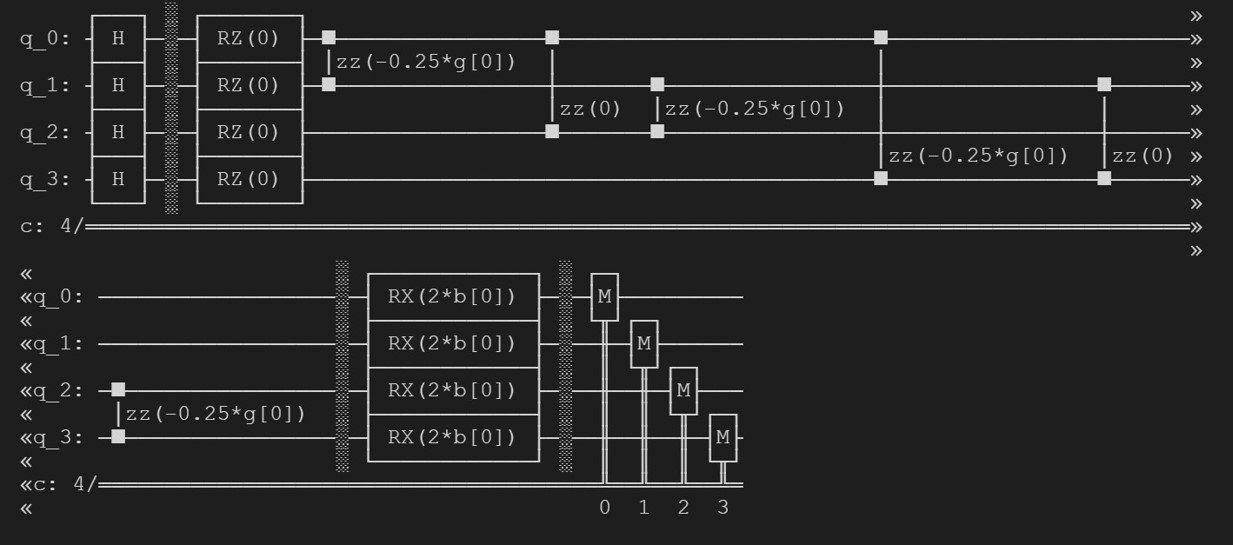

In [5]:
Image("images/circ.jpg")

The whole algorithm looks as follows now. At each optimization step we measure the state of our parametrized circuit. The measurement results in a distribution of probabilities. To evaluate the corresponding energy (that is the cost) we scale the energy for each bitstring that we measured with its probability. And take the average finally. A classical optimizer now tries to minimize this energy by updating parameters of our circuit. As we will see later the role of the optimizer becomes quite crucial. After updating the parameters, we again measure our quantum state. And so on until our optimizer lands in an optimal solution.

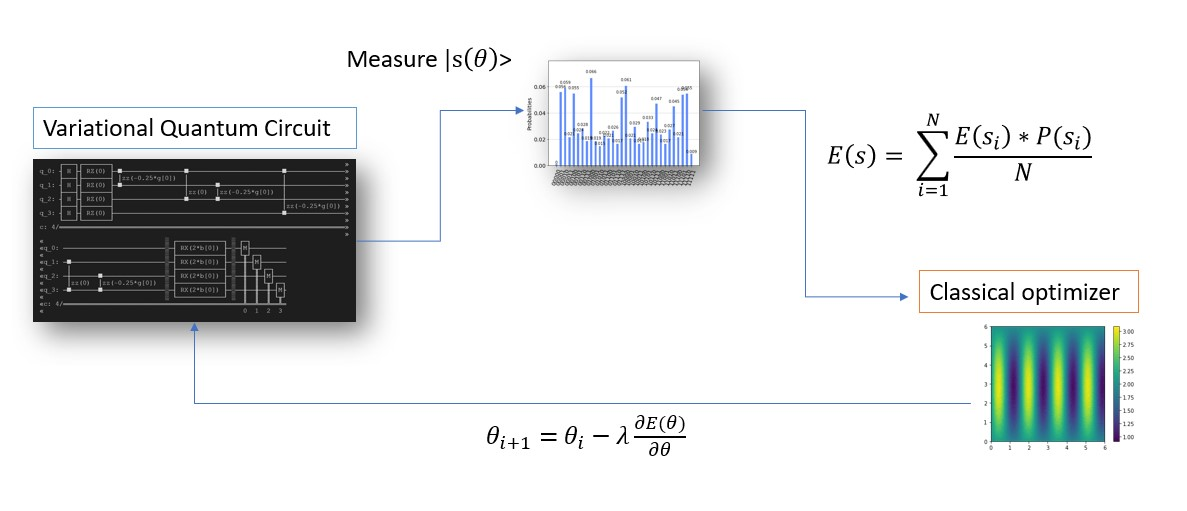

In [6]:
Image("images/overview.jpg")